## **Part 1**

Training pre-trained ResNet50 model with Cross entropy loss.

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
transform = weights.transforms()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np


# CIFAR-10
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset to only include airplane (class 0) and automobile (class 1)
train_indices = [i for i, label in enumerate(train_dataset.targets) if label == 0 or label == 1]
test_indices = [i for i, label in enumerate(test_dataset.targets) if label == 0 or label == 1]

train_subset = Subset(train_dataset, train_indices)
test_subset = Subset(test_dataset, test_indices)

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:03<00:00, 43.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


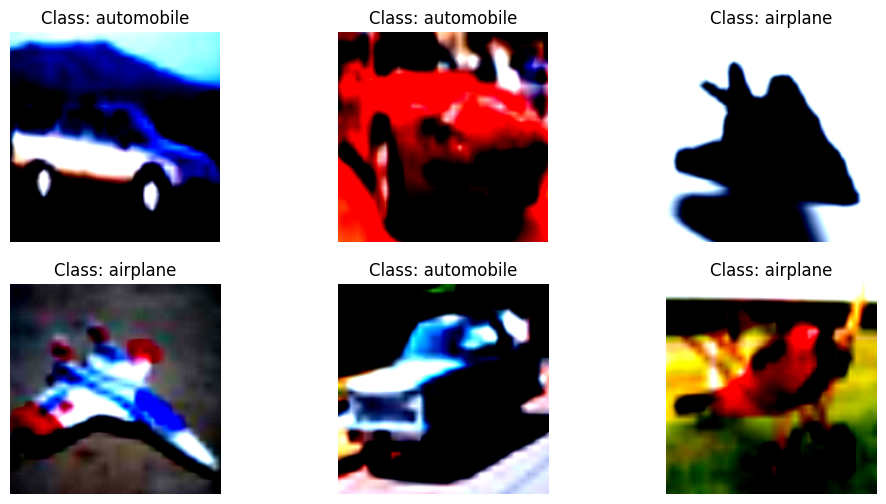

In [ ]:
def show_sample_images(dataset, num_images=6):
    figure = plt.figure(figsize=(12, 6))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        ax = figure.add_subplot(2, 3, i + 1)
        ax.imshow(image)
        ax.set_title(f"Class: {train_dataset.classes[label]}")
        ax.axis('off')
    plt.show()

# Display sample images
show_sample_images(train_subset, num_images=6)

In [ ]:
# Load pre-trained ResNet50
model = models.resnet50(weights = weights)

# 2 output classes
model.fc = nn.Linear(model.fc.in_features, 2)

criterion = nn.CrossEntropyLoss() #Cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]


In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

num_epochs = 15
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # average training loss and accuracy for this epoch
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct / total

    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)

    # Test
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_test_loss = running_loss / len(test_loader)
    epoch_test_accuracy = 100 * correct / total

    test_loss_history.append(epoch_test_loss)
    test_accuracy_history.append(epoch_test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%, "
          f"Test Loss: {epoch_test_loss:.4f}, Test Accuracy: {epoch_test_accuracy:.2f}%")


Epoch [1/15], Train Loss: 0.1152, Train Accuracy: 95.60%, Test Loss: 0.0926, Test Accuracy: 96.10%
Epoch [2/15], Train Loss: 0.0522, Train Accuracy: 98.17%, Test Loss: 0.1647, Test Accuracy: 95.25%
Epoch [3/15], Train Loss: 0.0535, Train Accuracy: 98.16%, Test Loss: 0.0553, Test Accuracy: 97.85%
Epoch [4/15], Train Loss: 0.0376, Train Accuracy: 98.59%, Test Loss: 0.0527, Test Accuracy: 98.20%
Epoch [5/15], Train Loss: 0.0268, Train Accuracy: 99.07%, Test Loss: 0.0605, Test Accuracy: 98.40%
Epoch [6/15], Train Loss: 0.0381, Train Accuracy: 98.55%, Test Loss: 0.0538, Test Accuracy: 98.05%
Epoch [7/15], Train Loss: 0.0155, Train Accuracy: 99.44%, Test Loss: 0.0281, Test Accuracy: 98.80%
Epoch [8/15], Train Loss: 0.0224, Train Accuracy: 99.13%, Test Loss: 0.0504, Test Accuracy: 98.50%
Epoch [9/15], Train Loss: 0.0200, Train Accuracy: 99.25%, Test Loss: 0.0581, Test Accuracy: 98.05%
Epoch [10/15], Train Loss: 0.0183, Train Accuracy: 99.35%, Test Loss: 0.0350, Test Accuracy: 98.65%
Epoch [11

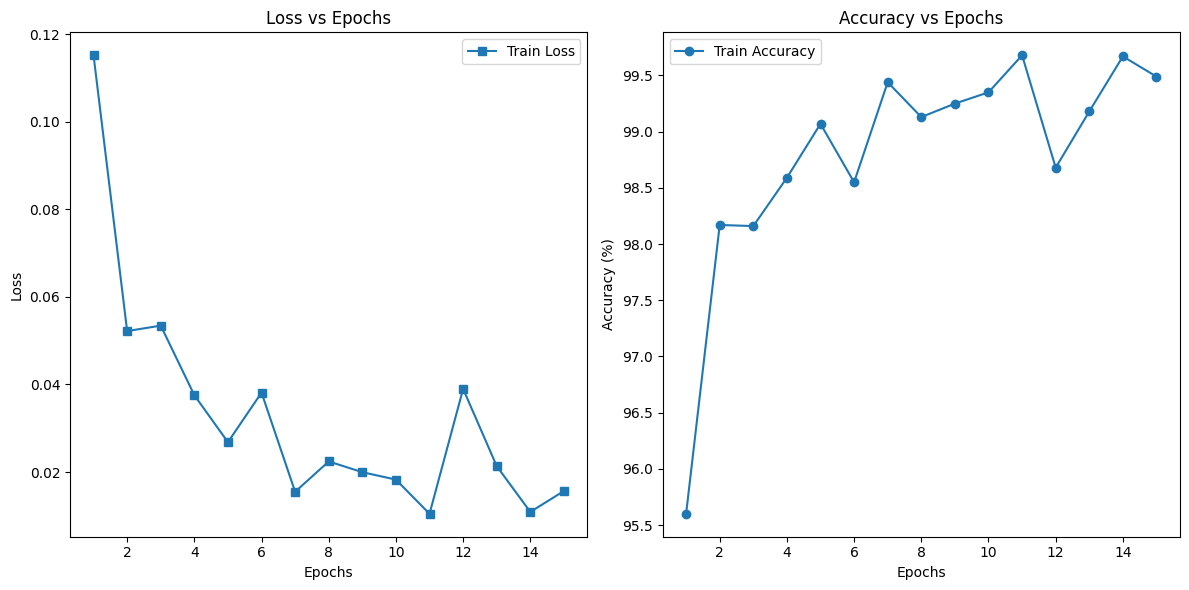

In [ ]:
# Plot accuracy and loss graphs
epochs = np.arange(1, num_epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label='Train Loss', marker = 's')
# plt.plot(epochs, test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history, label='Train Accuracy', marker= 'o')
# plt.plot(epochs, test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.tight_layout()
plt.show()

Creating feature map.

In [ ]:
# Register conv layers and weights for visualization
model_weights = []
conv_layers = []
model_children = list(model.children())
counter = 0
for i in range(len(model_children)):
    if isinstance(model_children[i], nn.Conv2d):
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif isinstance(model_children[i], nn.Sequential):
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if isinstance(child, nn.Conv2d):
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)

print(f"Total convolution layers: {counter}")

Total convolution layers: 49


In [ ]:
print(model.children)

<bound method Module.children of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256

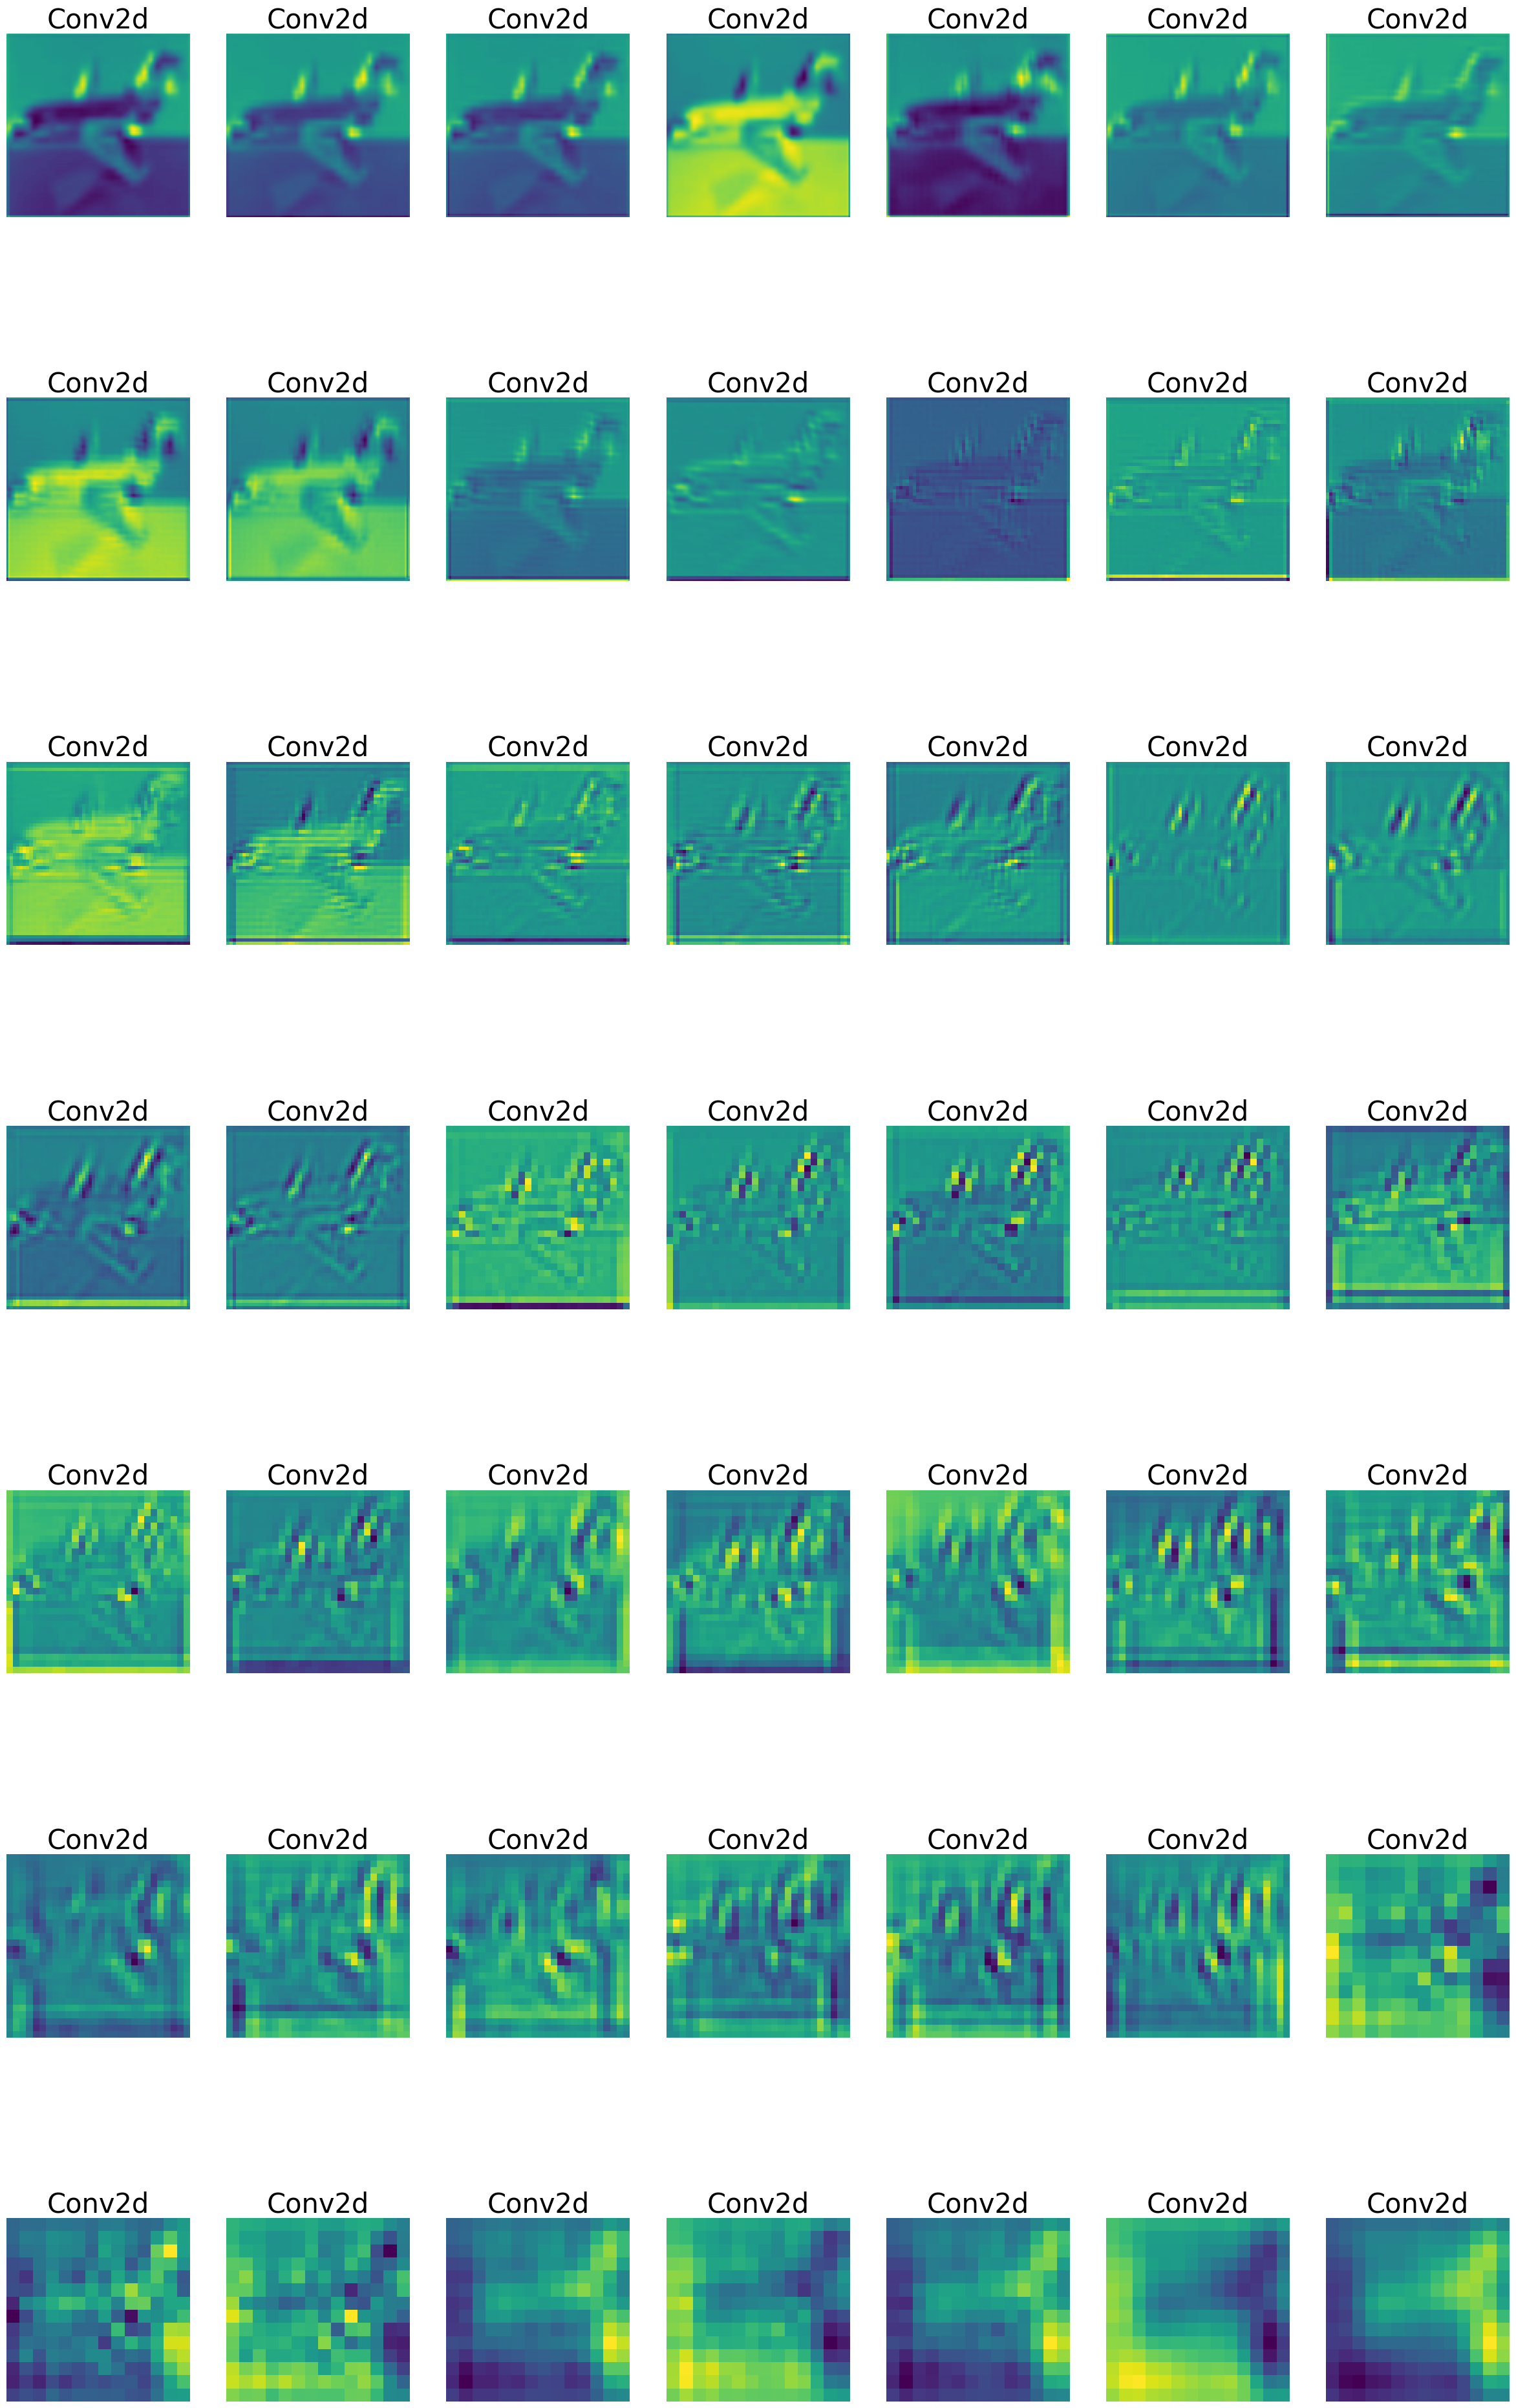

In [ ]:
# After training is done, extract and plot the feature maps
model.eval()

# Select an image from the training data to visualize feature maps
sample_input, _ = next(iter(train_loader))
image = sample_input[0]
image = transform(image)  # Apply transformation
image = image.unsqueeze(0)  # Add batch dimension
image = image.to(device)

# Extract feature maps
# We'll pass the image through each conv layer sequentially.
# Since we are only extracting feature maps from the conv layers
# (not the entire model in a forward pass), we are replicating a partial forward pass.

outputs = []
names = []

for layer in conv_layers:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

# Process feature maps for visualization

processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)  # Summing across channels
    gray_scale = gray_scale / feature_map.shape[0]  # Normalize by the number of channels
    processed.append(gray_scale.data.cpu().numpy())

# Plot
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 7, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

# plt.savefig('feature_maps_after_training.jpg', bbox_inches='tight')
plt.show()

## **Part 2**

Training the model with Triplet loss:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import random
from torchvision import models, transforms, datasets

# PREPRATION

from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
transform = weights.transforms()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Assume you already have a transform defined for your data
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     # Normalization values should match the pretraining normalization used by the model
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225])
# ])


train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_indices = [i for i, label in enumerate(train_dataset.targets) if label in [0, 1]]
test_indices = [i for i, label in enumerate(test_dataset.targets) if label in [0, 1]]
train_subset = torch.utils.data.Subset(train_dataset, train_indices)
test_subset = torch.utils.data.Subset(test_dataset, test_indices)

# Create a Triplet dataset

class TripletCIFAR10(Dataset):
    def __init__(self, subset):
        self.subset = subset
        # subset.dataset is the original CIFAR-10 dataset
        # subset.indices are the chosen indices
        self.data = self.subset.dataset.data[self.subset.indices]
        self.targets = np.array(self.subset.dataset.targets)[self.subset.indices]
        self.transform = self.subset.dataset.transform

        self.labels_set = set(self.targets)
        self.label_to_indices = {label: np.where(self.targets == label)[0] for label in self.labels_set}

    def __getitem__(self, index):
        anchor_img = self.data[index]
        anchor_label = self.targets[index]

        # Positive sample
        positive_index = index
        while positive_index == index:
            positive_index = np.random.choice(self.label_to_indices[anchor_label])
        positive_img = self.data[positive_index]

        # Negative sample
        negative_label = anchor_label
        while negative_label == anchor_label:
            negative_label = np.random.choice(list(self.labels_set - {anchor_label}))
        negative_index = np.random.choice(self.label_to_indices[negative_label])
        negative_img = self.data[negative_index]

        # Convert to PIL and apply transforms
        anchor_img = Image.fromarray(anchor_img)
        positive_img = Image.fromarray(positive_img)
        negative_img = Image.fromarray(negative_img)

        if self.transform:
            anchor_img = self.transform(anchor_img)
            positive_img = self.transform(positive_img)
            negative_img = self.transform(negative_img)

        return anchor_img, positive_img, negative_img

    def __len__(self):
        return len(self.subset)

triplet_train_dataset = TripletCIFAR10(train_subset)
triplet_train_loader = DataLoader(triplet_train_dataset, batch_size=32, shuffle=True)

# we need a normal dataloader for classification too for the opcomming parts
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# MODEL SETUP

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# For the first stage (Triplet Loss), we do not use the fully connected layer as a classifier.
# Instead, we treat the model as a feature extractor. We'll replace the final fc layer with Identity.
model.fc = nn.Identity()

model = model.to(device)


Stage 1 Epoch [1/5] Loss: 0.1835
Stage 1 Epoch [2/5] Loss: 0.0379
Stage 1 Epoch [3/5] Loss: 0.0193
Stage 1 Epoch [4/5] Loss: 0.0127
Stage 1 Epoch [5/5] Loss: 0.0077


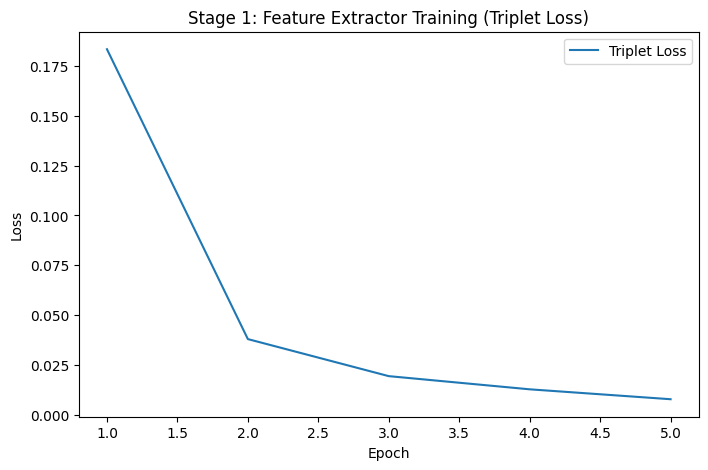

In [ ]:

# STAGE 1: TRAIN FEATURE EXTRACTOR WITH TRIPLET LOSS

triplet_loss_fn = nn.TripletMarginLoss(margin=1.0, p=2)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs_stage1 = 5

stage1_loss_history = []

model.train()
for epoch in range(num_epochs_stage1):
    running_loss = 0.0
    for anchor, positive, negative in triplet_train_loader:
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

        optimizer.zero_grad()
        # Extract embeddings
        anchor_emb = model(anchor)
        positive_emb = model(positive)
        negative_emb = model(negative)

        # Compute triplet loss
        loss = triplet_loss_fn(anchor_emb, positive_emb, negative_emb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(triplet_train_loader)
    stage1_loss_history.append(epoch_loss)
    print(f"Stage 1 Epoch [{epoch+1}/{num_epochs_stage1}] Loss: {epoch_loss:.4f}")

# Plot Triplet Loss for Stage 1
epochs_stage1 = np.arange(1, num_epochs_stage1+1)
plt.figure(figsize=(8,5))
plt.plot(epochs_stage1, stage1_loss_history, label='Triplet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Stage 1: Feature Extractor Training (Triplet Loss)')
plt.legend()
plt.show()


Stage 2 Epoch [1/5] Loss: 0.0393 Acc: 99.68%
Stage 2 Epoch [2/5] Loss: 0.0062 Acc: 99.88%
Stage 2 Epoch [3/5] Loss: 0.0044 Acc: 99.89%
Stage 2 Epoch [4/5] Loss: 0.0043 Acc: 99.86%
Stage 2 Epoch [5/5] Loss: 0.0030 Acc: 99.94%


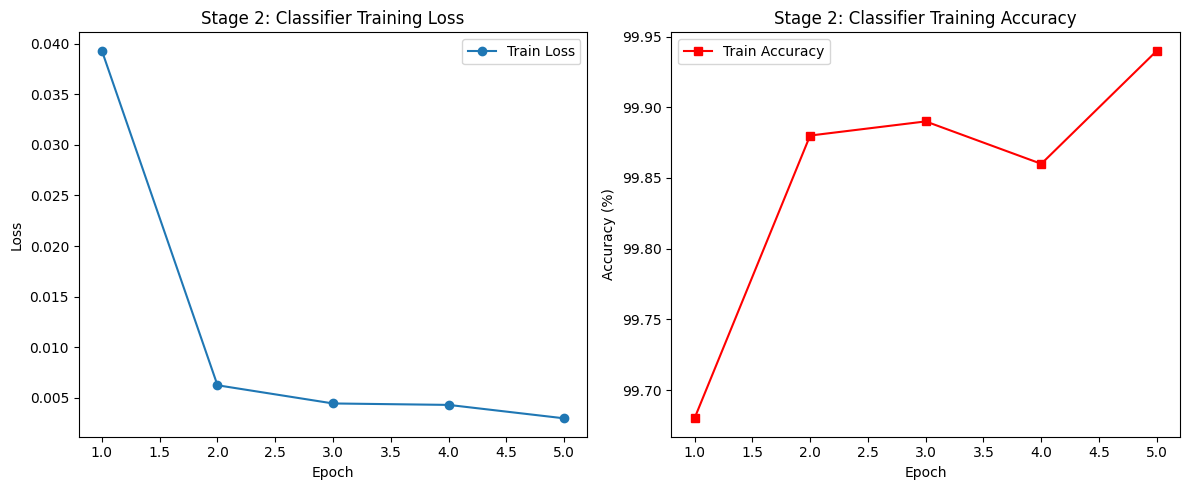

In [ ]:
# STAGE 2: FREEZE FEATURE EXTRACTOR, TRAIN FC WITH CE LOSS

# Attach a new fully connected layer for 2 classes
embedding_dim = 2048  # for ResNet50
model.fc = nn.Linear(embedding_dim, 2).to(device)

# Freeze all layers except the FC
for name, param in model.named_parameters():
    if 'fc' not in name:
        param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
num_epochs_stage2 = 5

stage2_train_loss_history = []
stage2_train_acc_history = []

model.train()
for epoch in range(num_epochs_stage2):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100.0 * correct / total
    stage2_train_loss_history.append(train_loss)
    stage2_train_acc_history.append(train_acc)

    print(f"Stage 2 Epoch [{epoch+1}/{num_epochs_stage2}] Loss: {train_loss:.4f} Acc: {train_acc:.2f}%")

# Plot Loss and Accuracy for Stage 2 in separate subplots
epochs_stage2 = np.arange(1, num_epochs_stage2+1)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_stage2, stage2_train_loss_history, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Stage 2: Classifier Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_stage2, stage2_train_acc_history, marker='s', color='red', label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Stage 2: Classifier Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# EVALUATE ON TEST SET

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = 100.0 * correct / total
print(f"Test Accuracy after Stage 2: {test_acc:.2f}%")

Test Accuracy after Stage 2: 99.55%


Extracting feature map.

Total convolution layers: 49


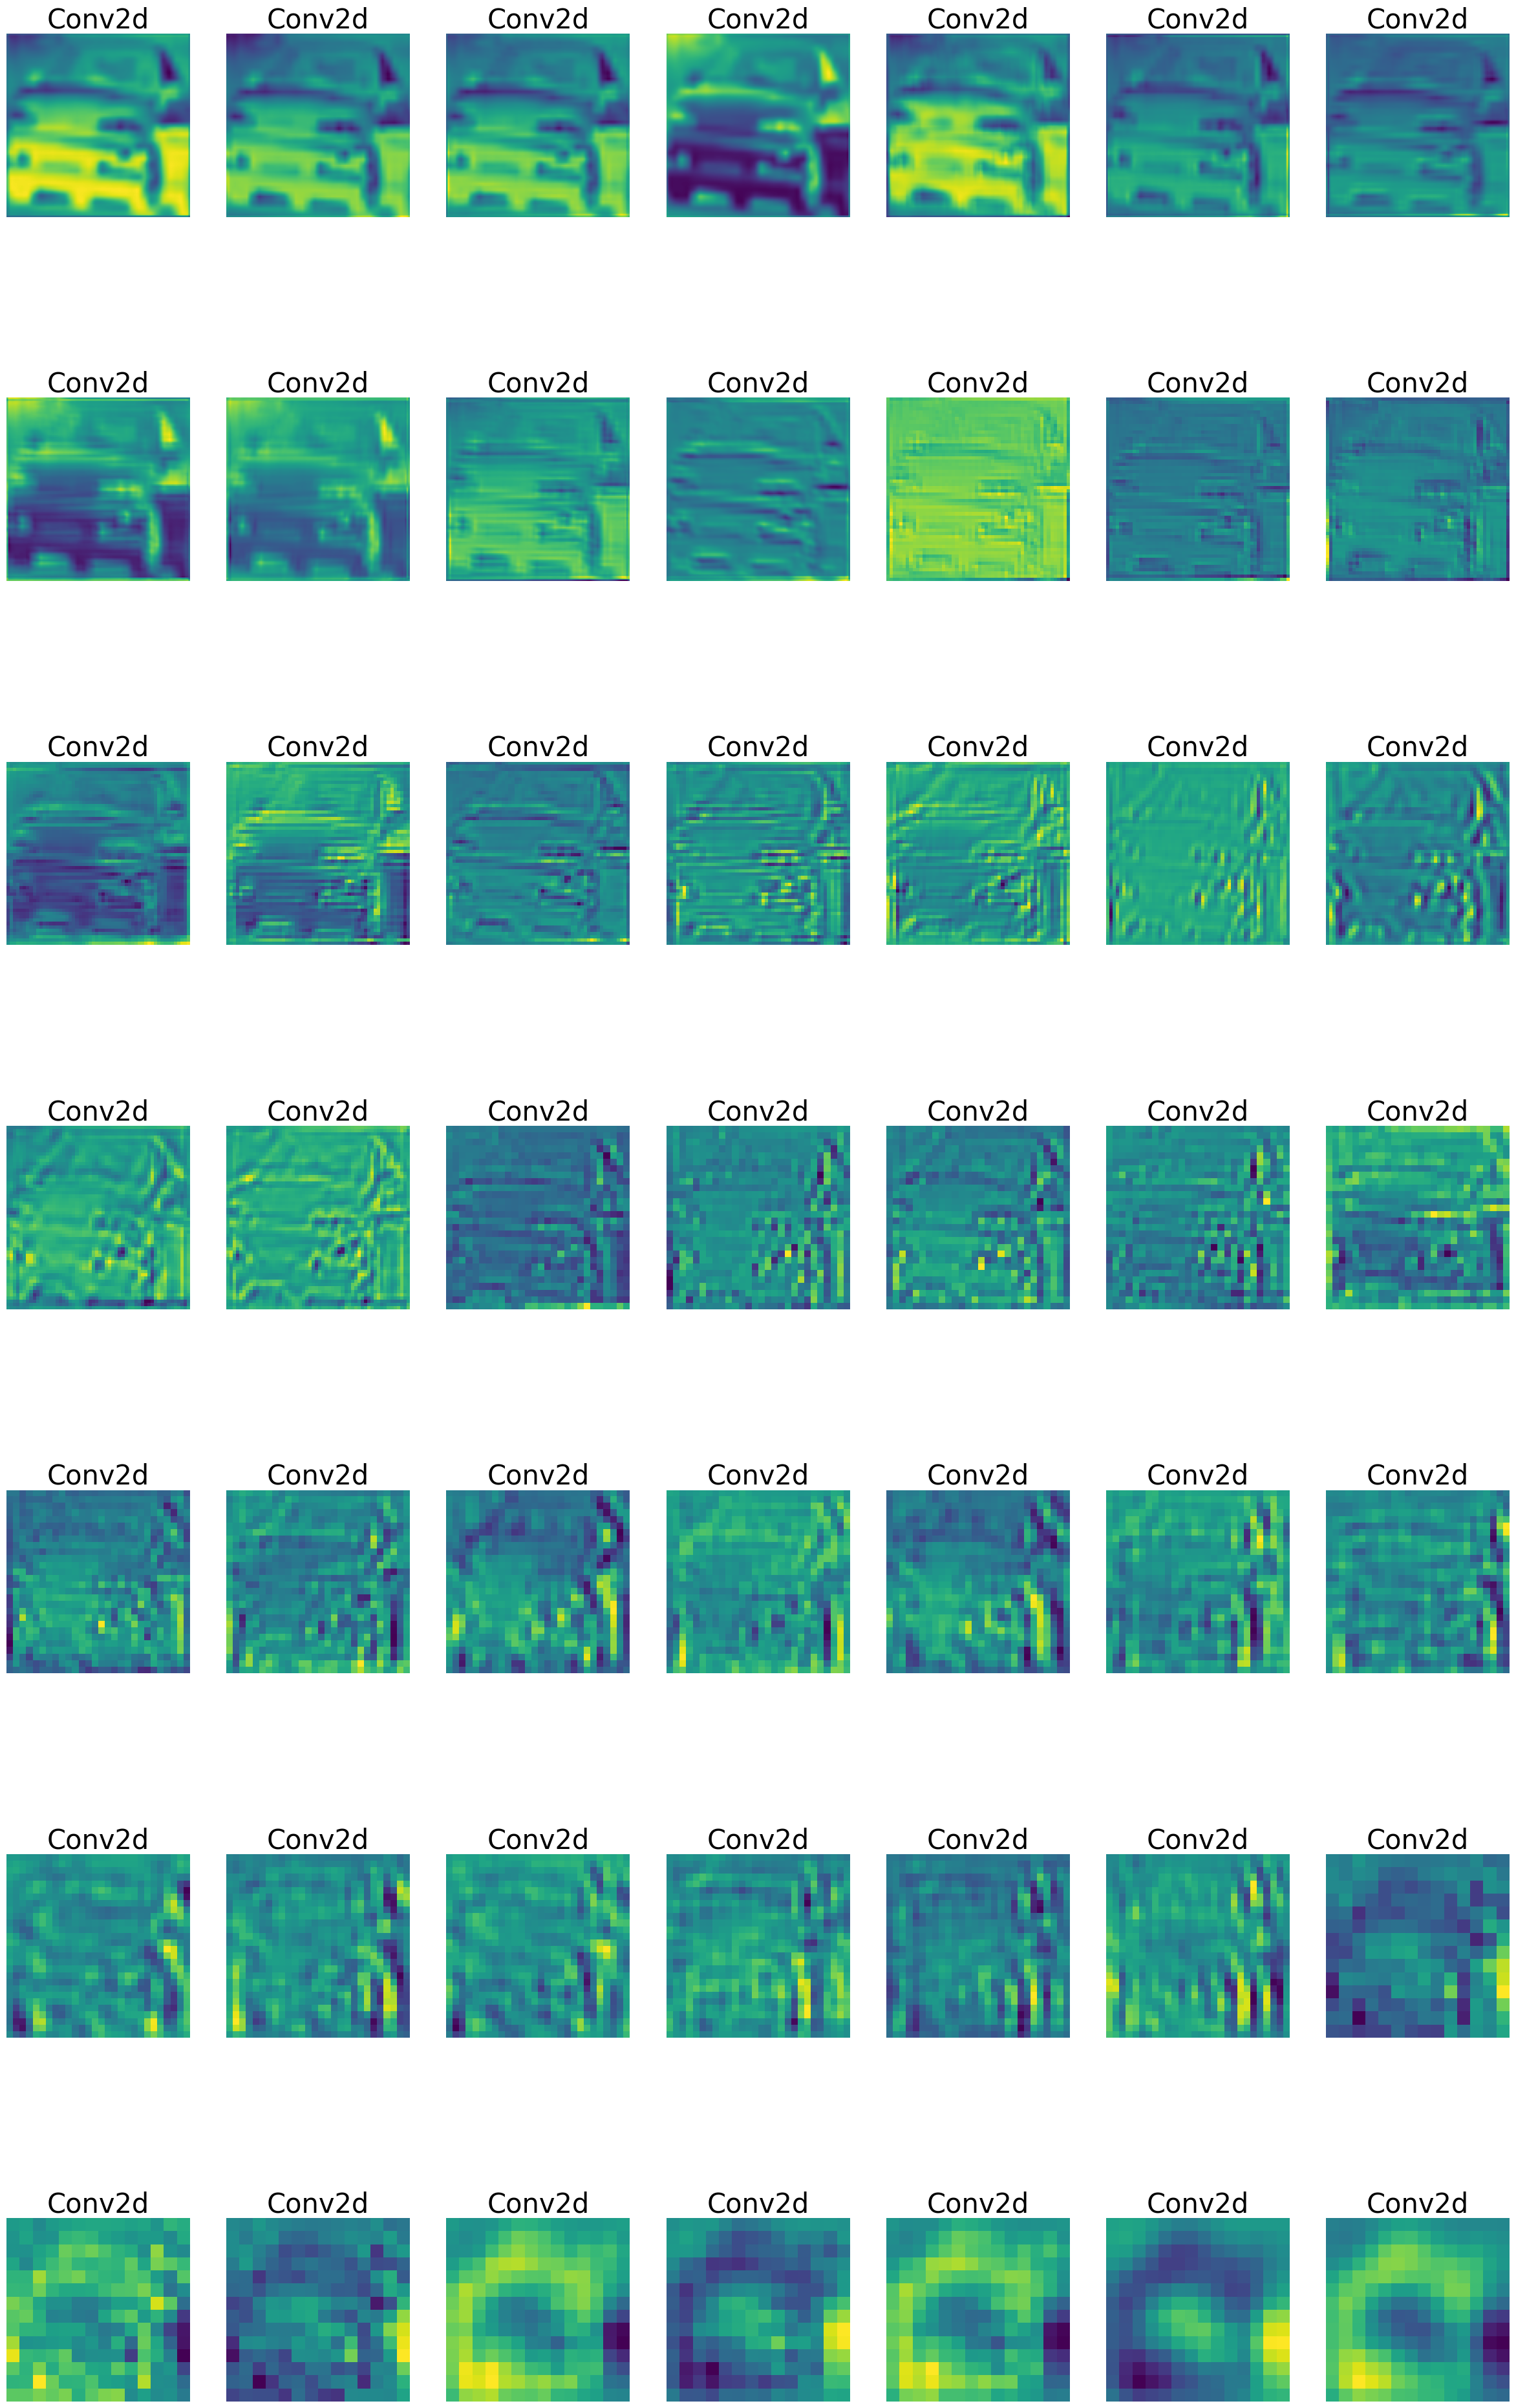

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Register conv layers and weights for visualization
model_weights_tri = []
conv_layers_tri = []
model_children_tri = list(model.children())
counter = 0
for i in range(len(model_children_tri)):
    if isinstance(model_children_tri[i], nn.Conv2d):
        counter += 1
        model_weights_tri.append(model_children_tri[i].weight)
        conv_layers_tri.append(model_children_tri[i])
    elif isinstance(model_children_tri[i], nn.Sequential):
        for j in range(len(model_children_tri[i])):
            for child in model_children_tri[i][j].children():
                if isinstance(child, nn.Conv2d):
                    counter += 1
                    model_weights_tri.append(child.weight)
                    conv_layers_tri.append(child)

print(f"Total convolution layers: {counter}")

# Set the model to evaluation mode
model.eval()

# Select an image from the training data to visualize feature maps
sample_input, _ = next(iter(train_loader))
image = sample_input[0]  # first image from the batch

# Apply the same transforms
image = transform(image)
image = image.unsqueeze(0)
image = image.to(device)

# Extract feature maps
outputs_tri = []
names_tri = []

# We'll pass the image through each conv layer sequentially.
# Since we are only extracting feature maps from the conv layers
# (not the entire model in a forward pass), we are replicating a partial forward pass.
x = image
for layer in conv_layers:
    x = layer(x)
    outputs_tri.append(x)
    names_tri.append(str(layer))


# Process feature maps for visualization
processed_tri = []
for feature_map in outputs_tri:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)  # Summing across channels
    gray_scale = gray_scale / feature_map.shape[0]  # Normalize by the number of channels
    processed_tri.append(gray_scale.data.cpu().numpy())

# Plot
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed_tri)):
    a = fig.add_subplot(7, 7, i+1)
    imgplot = plt.imshow(processed_tri[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

# plt.savefig('feature_maps_after_training.jpg', bbox_inches='tight')
plt.show()

## **PART 3**

### Comparison and Analysis

Below is a focused comparison of the three key aspects—**feature map quality**, **final test accuracy**, and **convergence speed**—for two different training strategies: (1) Using only Cross Entropy (CE) loss from the start, and (2) Using Triplet Loss first to train the feature extractor, followed by CE loss for the classifier.

#### 1. Quality of Feature Maps
- **Cross Entropy Only:**  
  When the model is trained solely with CE loss, the feature maps tend to become tailored specifically to the classification task at hand. This approach can successfully extract features useful for distinguishing the given classes, but does not necessarily produce a well-structured embedding space. The learned representations, while effective for the trained classes, may be less generalizable or semantically clear.

- **Triplet Loss + Cross Entropy:**  
  By first training with Triplet Loss, the model’s feature extractor learns to embed images such that samples from the same class are close together and samples from different classes are far apart. This process leads to more meaningful and discriminative features. Once these embeddings are well-structured, adding CE loss to train only the final classifier layer refines the decision boundary without disrupting the already robust feature representations. The result is higher-quality, more interpretable feature maps that better capture the underlying class distinctions.

#### 2. Final Accuracy on Test Data
- **Cross Entropy Only:**  
  Training with CE loss alone can achieve high test accuracy (e.g., around 97–98%). This is solid performance, but it might not represent the maximum potential of the model on the dataset.

- **Triplet Loss + Cross Entropy:**  
  Starting with Triplet Loss ensures the embeddings are highly discriminative. Then, applying CE loss for just a few epochs on the final layer rapidly pushes the accuracy to even higher levels (e.g., ~99.5%). In other words, the metric learning stage gives the model a head start, enabling it to surpass the accuracy achieved by CE-only training.

#### 3. Convergence Speed
- **Cross Entropy Only:**  
  With CE from scratch, the model must simultaneously learn both a strong feature representation and a good decision boundary. This can take longer and may require more epochs to achieve high accuracy. The learning is somewhat interwoven: the model refines features and classification boundaries in tandem, resulting in a more gradual convergence. I am training the model for 15 epochs.

- **Triplet Loss + Cross Entropy:**  
  The two-stage approach first focuses on creating a robust embedding space with Triplet Loss. After this space is well-defined, training the classifier layer with CE loss converges extremely quickly, since the embeddings already separate classes effectively. Although there’s an initial investment of time in the Triplet phase, the subsequent classification phase converges notably faster, achieving very high accuracy in fewer epochs than CE-only training would allow. I am training the feature extractor and the FC layer for 5 epochs, so it converges clearly faster.

---

### Summary

- **Feature Map Quality:** Better and more discriminative after Triplet Loss pre-training, compared to CE-only training. In my feature maps it is not clear enough.
- **Final Test Accuracy:** Higher with the combined Triplet + CE approach.
- **Convergence Speed:** While CE-only training is straightforward, the combined approach yields much faster convergence in the final classification step, thanks to the well-structured embedding space produced by the Triplet Loss stage.


## **PART 4**

Using Triplet loss + Cross entropy loss.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models
from PIL import Image
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# DATASET DEFINITION WITH LABELS

class TripletCIFAR10WithLabels(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.data = self.subset.dataset.data[self.subset.indices]
        self.targets = np.array(self.subset.dataset.targets)[self.subset.indices]
        self.transform = transform

        self.labels_set = set(self.targets)
        self.label_to_indices = {label: np.where(self.targets == label)[0]
                                 for label in self.labels_set}

    def __getitem__(self, index):
        anchor_img = self.data[index]
        anchor_label = self.targets[index]

        # Positive example
        positive_index = index
        while positive_index == index:
            positive_index = np.random.choice(self.label_to_indices[anchor_label])
        positive_img = self.data[positive_index]

        # Negative example
        negative_label = anchor_label
        while negative_label == anchor_label:
            negative_label = np.random.choice(list(self.labels_set - {anchor_label}))
        negative_index = np.random.choice(self.label_to_indices[negative_label])
        negative_img = self.data[negative_index]

        # Convert to PIL and apply transforms
        anchor_img = Image.fromarray(anchor_img)
        positive_img = Image.fromarray(positive_img)
        negative_img = Image.fromarray(negative_img)

        if self.transform is not None:
            anchor_img = self.transform(anchor_img)
            positive_img = self.transform(positive_img)
            negative_img = self.transform(negative_img)

        return anchor_img, positive_img, negative_img, anchor_label

    def __len__(self):
        return len(self.subset)


# DATA LOADING

from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
transform = weights.transforms()

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_indices = [i for i, label in enumerate(train_dataset.targets) if label in [0, 1]]
test_indices = [i for i, label in enumerate(test_dataset.targets) if label in [0, 1]]

train_subset = Subset(train_dataset, train_indices)
test_subset = Subset(test_dataset, test_indices)

# Create the triplet dataset with transform
triplet_train_dataset = TripletCIFAR10WithLabels(train_subset, transform=transform)
triplet_train_loader = DataLoader(triplet_train_dataset, batch_size=32, shuffle=True)

# For testing, just use test_subset which already has transform applied
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# MODEL DEFINITION

# We need a model that gives us both embeddings and logits.
# We'll modify ResNet to return embeddings (penultimate layer) and logits (final fc output).

class ResNetWithEmbeddings(nn.Module):
    def __init__(self, base_model, embedding_dim=2048, num_classes=2):
        super().__init__()
        # Extract all layers except fc
        self.features = nn.Sequential(*list(base_model.children())[:-1])
        # Define a new FC layer
        self.fc = nn.Linear(embedding_dim, num_classes)

    def forward(self, x):
        x = self.features(x)
        # Now x is [batch, 2048, 1, 1]
        x = torch.flatten(x, 1)  # [batch, 2048]
        embeddings = x
        logits = self.fc(embeddings)
        return embeddings, logits

base_resnet = resnet50(weights=weights)
model = ResNetWithEmbeddings(base_resnet, embedding_dim=2048, num_classes=2).to(device)


In [ ]:
# LOSSES AND OPTIMIZER

triplet_loss_fn = nn.TripletMarginLoss(margin=1.0, p=2)
ce_loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 5

train_loss_history = []
train_ce_loss_history = []
train_triplet_loss_history = []
train_acc_history = []


# TRAINING LOOP
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_ce_loss = 0.0
    running_triplet_loss = 0.0
    correct = 0
    total = 0

    for anchor, positive, negative, anchor_label in triplet_train_loader:
        anchor, positive, negative, anchor_label = anchor.to(device), positive.to(device), negative.to(device), anchor_label.to(device)

        optimizer.zero_grad()
        # Get embeddings and logits for each input
        anchor_emb, anchor_logits = model(anchor)
        positive_emb, _ = model(positive)
        negative_emb, _ = model(negative)

        # Compute Triplet Loss
        trip_loss = triplet_loss_fn(anchor_emb, positive_emb, negative_emb)
        # Compute CE Loss using anchor logits and anchor_label
        ce_loss = ce_loss_fn(anchor_logits, anchor_label)

        # Total loss
        loss = trip_loss + ce_loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_ce_loss += ce_loss.item()
        running_triplet_loss += trip_loss.item()

        # Calculate accuracy from anchor_logits
        _, predicted = anchor_logits.max(1)
        total += anchor_label.size(0)
        correct += (predicted == anchor_label).sum().item()

    epoch_loss = running_loss / len(triplet_train_loader)
    epoch_ce_loss = running_ce_loss / len(triplet_train_loader)
    epoch_trip_loss = running_triplet_loss / len(triplet_train_loader)
    epoch_acc = 100.0 * correct / total

    train_loss_history.append(epoch_loss)
    train_ce_loss_history.append(epoch_ce_loss)
    train_triplet_loss_history.append(epoch_trip_loss)
    train_acc_history.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Total Loss: {epoch_loss:.4f} "
          f"(CE: {epoch_ce_loss:.4f}, Triplet: {epoch_trip_loss:.4f}) "
          f"Train Acc: {epoch_acc:.2f}%")


Epoch [1/5] Total Loss: 0.3094 (CE: 0.1473, Triplet: 0.1621) Train Acc: 96.07%
Epoch [2/5] Total Loss: 0.0614 (CE: 0.0267, Triplet: 0.0347) Train Acc: 99.16%
Epoch [3/5] Total Loss: 0.0357 (CE: 0.0158, Triplet: 0.0199) Train Acc: 99.50%
Epoch [4/5] Total Loss: 0.0242 (CE: 0.0105, Triplet: 0.0138) Train Acc: 99.64%
Epoch [5/5] Total Loss: 0.0155 (CE: 0.0067, Triplet: 0.0088) Train Acc: 99.84%


Test Accuracy: 99.60%


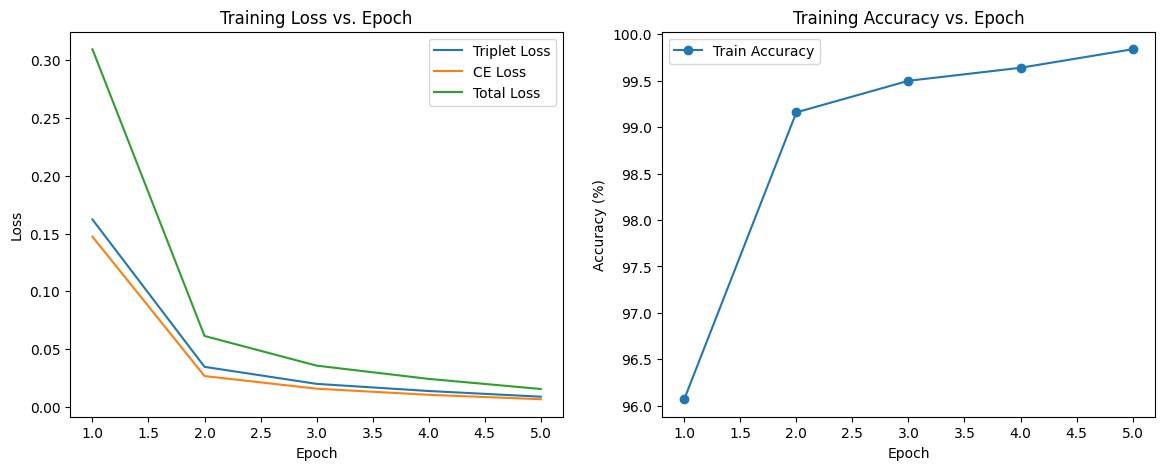

In [ ]:
# EVALUATION ON TEST SET

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        _, logits = model(inputs)
        _, predicted = logits.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = 100.0 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")


# PLOTTING
epochs = np.arange(1, num_epochs+1)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_triplet_loss_history, label='Triplet Loss')
plt.plot(epochs, train_ce_loss_history, label='CE Loss')
plt.plot(epochs, train_loss_history, label='Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc_history, marker='o', label='Total Loss')
plt.plot(epochs, stage2_train_acc_history, marker='o', label='Triplet Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs. Epoch')
plt.legend()

# # Show Test Accuracy as a bar
# plt.subplot(1,3,3)
# plt.bar(['Test Accuracy'], [test_acc])
# plt.title('Final Test Accuracy')
# plt.ylim(0, 100)

# plt.tight_layout()
# plt.show()


### Analysis of the Combined Loss Approach

When applying both Triplet Loss and Cross Entropy Loss simultaneously, the model gains the best of both worlds from the very start of training:

1. **Early Structuring of the Embedding Space:**  
   Triplet Loss encourages the model to cluster samples of the same class together and push different classes apart. This means the feature space becomes well-structured early in the training process. By having a cleanly separated embedding space, the classifier layer can easily map these embeddings to class labels.

2. **Simultaneous Learning of Classification Boundaries:**  
   While Triplet Loss focuses on the relative distances between samples, Cross Entropy Loss ensures the model directly learns to classify inputs into the correct category. Training with both losses at once allows the model to establish meaningful embeddings while simultaneously learning how to assign class labels. This removes the need for separate training stages and integrates both representation learning and classification decision-making into a single unified process.

3. **Faster Attainment of High Performance:**  
   The results show that using both losses together leads to a very high test accuracy (around 99.6%) in just a few epochs. This rapid improvement suggests that the combined loss setting makes training more efficient. The model converges quickly to a strong and discriminative representation that supports top-tier classification accuracy without the additional time typically required by separate-stage or single-loss approaches.

**Why This Approach Works So Well:**  
The key advantage of combining Triplet and Cross Entropy losses is the synergy it creates. Triplet Loss structures the feature space, providing a solid foundation for class differentiation, while Cross Entropy Loss fine-tunes this structure to directly improve classification performance. Because these objectives are pursued simultaneously, the model converges to an optimal representation more quickly, saving both time and training effort while achieving excellent accuracy.

***In conclusion comparing the loss and accuracy plots in training phase of different parts, we can see that the combined losses has the less losses and it converges better comparing to part 2 and has a big improvement comparing to part 1.
Also we can see that the final test accuracy of Part 4 is a bit more than Part 2 and more than Part 1.***